In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
path = 'C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/ultimate_challenge/'
logins = pd.read_json(path + 'logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins['day'] = pd.to_datetime(logins['login_time']).apply(lambda x: x.weekday())

In [6]:
logins['login_time'] =  pd.to_datetime(logins['login_time'], format='%Y-%m-%d %H:%M:%S')

In [7]:
logins.sort_index(inplace=True)
logins['count'] = 1

In [8]:
logins.set_index('login_time', inplace=True)

In [9]:
logins_15 = logins.resample("15min").sum()

In [10]:
logins_15

,day,count
login_time,,
1970-01-01 20:00:00,6,2
1970-01-01 20:15:00,18,6
1970-01-01 20:30:00,27,9
1970-01-01 20:45:00,21,7
1970-01-01 21:00:00,3,1
...,...,...
1970-04-13 17:45:00,0,5
1970-04-13 18:00:00,0,5
1970-04-13 18:15:00,0,2


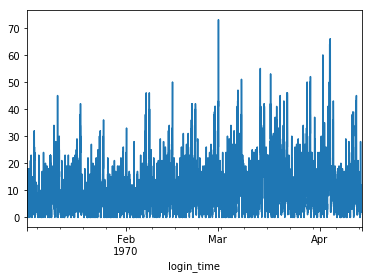

In [11]:
logins_15['count'].plot()
plt.show()

Plotting each point is too noisy to extract meaningful information. Separating into the individual months below for a monthly view

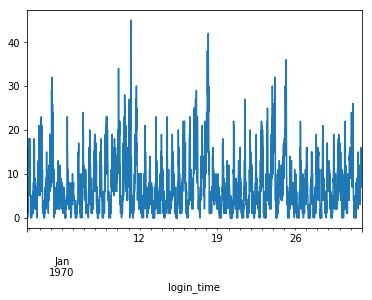

In [12]:
jan = logins_15['1970-01-01':'1970-01-31']
jan['count'].plot()
plt.show()

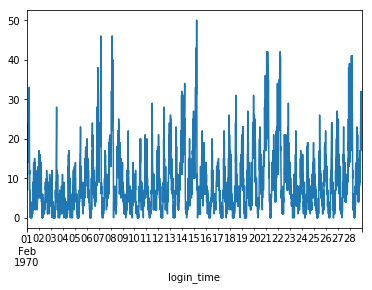

In [13]:
feb = logins_15['1970-02-01':'1970-02-28']
feb['count'].plot()
plt.show()

The graphs for January and February are still very cluttered. Splitting into day of the week per month below. 

In [14]:
mar = logins_15['1970-03-01':'1970-03-31']
apr = logins_15['1970-04-01':'1970-04-30']

In [15]:
jan.reset_index(drop=False, inplace=True)
jan['day'] = pd.to_datetime(jan['login_time']).apply(lambda x: x.weekday())

feb.reset_index(drop=False, inplace=True)
feb['day'] = pd.to_datetime(feb['login_time']).apply(lambda x: x.weekday())

mar.reset_index(drop=False, inplace=True)
mar['day'] = pd.to_datetime(mar['login_time']).apply(lambda x: x.weekday())

apr.reset_index(drop=False, inplace=True)
apr['day'] = pd.to_datetime(apr['login_time']).apply(lambda x: x.weekday())

C:\Users\Ariel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ariel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

C:\Users\Ariel\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


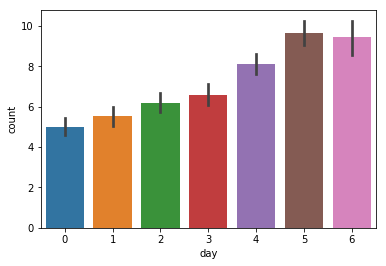

In [16]:
sns.barplot(x='day', y='count', data=jan)

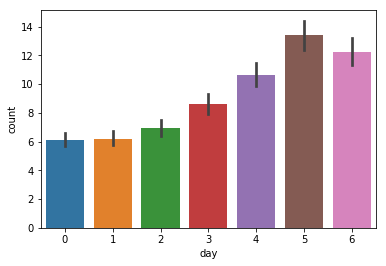

In [17]:
sns.barplot(x='day', y='count', data=feb)

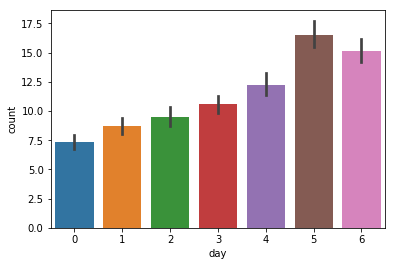

In [18]:
sns.barplot(x='day', y='count', data=mar)

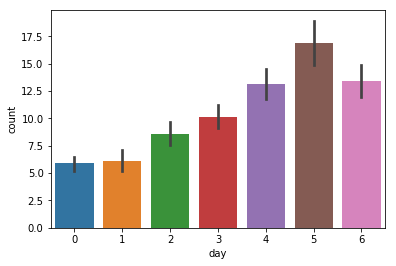

In [19]:
sns.barplot(x='day', y='count', data=apr)

From the monthly charts by week we can see that the bulk of login times are Friday through Sunday with Saturday having the most logins. 

## Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [20]:
import json

file = open(path+'ultimate_data_challenge.json', 'r')
data = pd.DataFrame(json.load(file))
file.close()

In [21]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We can see that columns 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver' have missing values. 

In [24]:
print(data['avg_rating_of_driver'].mean())
print(data['avg_rating_of_driver'].median())

4.6015592912744685
4.9


In [25]:
print(data['avg_rating_by_driver'].mean())
print(data['avg_rating_by_driver'].median())

4.778158195947439
5.0


For columns 'avg_rating_of_driver' and 'avg_rating_by_driver', the median will be used to fill in the missing values

In [26]:
# Fill in missing values
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].median(), inplace=True)
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].median(), inplace=True)

In [27]:
count = 0
count2 = 0
count3 = 0
for row in range(len(data)):
    if data['phone'][row] not in ('Android', 'iPhone'):
        count = count + 1
    
    elif data['phone'][row] == 'iPhone':
        count2 = count2 +1 
        
    elif data['phone'][row] == 'Android':
        count3 = count3 +1

print('Missing phone data:', count)
print('Percent missing:',(count/len(data))*100, '%')
print('Percent iPhone:',(count2/len(data))*100, '%')
print('Percent Android:',(count3/len(data))*100, '%')

Missing phone data: 396
Percent missing: 0.792 %
Percent iPhone: 69.164 %
Percent Android: 30.043999999999997 %


iPhones make up almost 70% of the data. Since such a small amount, .792%, of the phone data is missing, it will be filled-in with iPhone. 

In [28]:
# Fill in missing phone values
data['phone'].fillna('iPhone', inplace=True)

In [29]:
# The sign-up date and last-trip date columns need to be 
# converted to datetime rather than objects

data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['signup_date'] = pd.to_datetime(data['signup_date'])

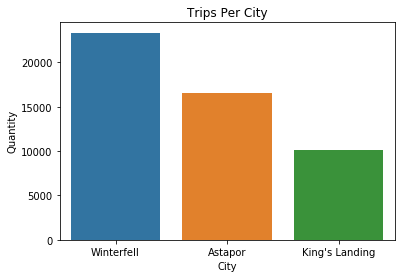

In [30]:
sns.barplot(x = data['city'].value_counts().index, y = data['city'].value_counts())
plt.title('Trips Per City')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

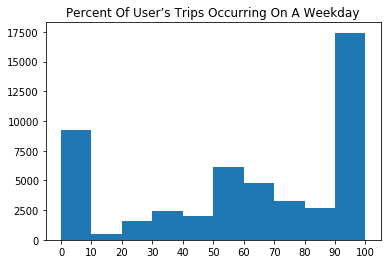

In [31]:
plt.hist(data['weekday_pct'], bins = 10)
plt.title('Percent Of User’s Trips Occurring On A Weekday')
plt.xticks(range(0,110,10))
plt.show

We can see from the histogram above that for about 17,500 users, 90-100% of their trips are on a weekday. The second largest group, about 10,000 users, have weekend 0-10% of their trips on weekdays. 

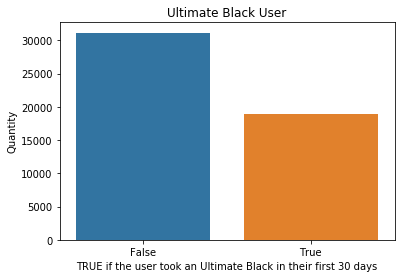

In [32]:
sns.barplot(x = data['ultimate_black_user'].value_counts().index, y = data['ultimate_black_user'].value_counts())
plt.title('Ultimate Black User')
plt.xlabel('TRUE if the user took an Ultimate Black in their first 30 days')
plt.ylabel('Quantity')
plt.show()

From the bar graph above we can see that most accounts were created but did not become active users within the first month of signing on. 

In [33]:
data.sort_values('last_trip_date', ascending=False)[0:1]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,5.0,1.0,2014-07-01,Android,0.0,True,25.0,11.94,5.0


In [34]:
print('Fraction of observed users that were retained:')
print((len(data[data['last_trip_date']>= '2014-06-01'])/len(data))*100, '%')

Fraction of observed users that were retained:
37.608000000000004 %


In [35]:
# Create 1-hot encoded retained column
#data['Retained'] = np.nan
#for row in range(len(data)):
#    if data['last_trip_date'][row] == '2014-07-01':
#        data['Retained'][row] = 1
#    else:
#        data['Retained'][row] = 0

In [36]:
data.loc[data['last_trip_date'] >= '2014-06-01', 'retained'] = 1
data.loc[data['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [37]:
data['city_encoded'] = np.nan
for i in range(len(data)):
    if data['city'][i] == 'King\'s Landing':
        data['city_encoded'][i] = 0
    elif data['city'][i] == 'Astapor':
        data['city_encoded'][i] = 1
    else:
        data['city_encoded'][i] = 2

C:\Users\Ariel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Ariel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


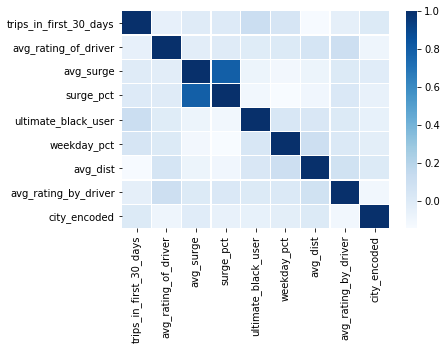

In [134]:
sns.heatmap(data.corr(), cmap='Blues', linewidths=.2)

Average-Surge and Surge-Percentage are the only items that are highly correlated based on the correlation heat map above. This could be because in order for there to be a positive value in the avg_surge column, surge trips must have been taken. This'll increase the surg_pct at the same time.

Two columns were created as well to test their correlation, a retained column and the city column (one-hot encoded). There was not a strong correlation between the user's city and retention. 

### 2. Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

###### A measure of success could be the percentage that each driver passes over to the other city. If this measure is zero for a driver, the driver remains in their perspective city. If the measure is 100% then the driver passes to the other city for each trip.


2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

###### The experiment must be split into weekend and weekday given the nature of each city's habits

b. what statistical test(s) you will conduct to verify the significance of the
observation

###### A t-test wil be used to test significance with a 95% confidence interval. 

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

###### Assuming the results were significant, the amount of trips can be analyzed to see if it's practically significant to enact the toll waver. This can be done by analyzing  the benefits of waving the toll. Do those benefits outweigh the cost of the tolls? Does demand increase? Does intercity traveling increase? 


### 3. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Preparing the the dataset for maching learning algorithms

In [89]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [40]:
# The label, retained column, was created by using the 'last trip date'
# column. Therefore, it will be dropped. 
data.drop('last_trip_date', axis=1, inplace=True)
data.drop('signup_date', axis=1, inplace=True)

In [41]:
# Create the label
label = pd.DataFrame(columns=['label'])
label['label'] = data['retained']

In [42]:
# Drop that column from the dataset to create the features.
data.drop('retained', axis=1, inplace=True)

In [43]:
# Convert Categorical variables to dummy variables
data_dv = pd.get_dummies(data, columns = ['city', 'phone', 'ultimate_black_user'])

In [44]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(data_dv, label, test_size=.2, random_state=20)

Logistic Regression

Since the label is binary (user retained or not), Logistic Regression will be used as the initial model for prediction. This model is used as the base model as it is simple, efficient, and easy to interpret.

In [104]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
# Print the accuracy from the testing data.
y_pred = clf.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.7135


In [106]:
confusion_matrix(y_pred, y_test)

array([[5333, 1909],
       [ 956, 1802]], dtype=int64)

This model predicted correctly only 71.35% of the time. A correct prediction can be seen in the confusion matrix (True-Positives and True-Negatives).

True Positive (upper-left): Number of retentions predicted correctly
True Negative (lower-right): Number of losses predicted correctly
False Positive (upper-right): Number of retentions predicted incorrectly
False Negative (lower-left): Number of retentions predicted incorrectly

To try and obtain a better prediction, we will tune the parameters of this model and rerun with the best parameters. 

Tuning parameters of the Logistic Regression 

In [107]:
# Create lists of parameter for Decision Tree Classifier
param_grid_clf = {'C': [.001, .01, .1, 1, 10], 'penalty' : ['l1', 'l2']}

clf_gs =GridSearchCV(clf, param_grid_clf)

clf_gs.fit(x_train, y_train)

C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-l

C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
# View The Best Parameters
print('Best Criterion:', clf_gs.best_estimator_)

Best Criterion: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


The best parameters were "C=.01" and "penalty = L2". 

In [109]:
# Print the accuracy from the testing data.
y_pred_clf_gs = clf_gs.predict(x_test)
print(accuracy_score(y_pred_clf_gs, y_test))

0.7152


In [110]:
confusion_matrix(y_pred_clf_gs, y_test)

array([[5387, 1946],
       [ 902, 1765]], dtype=int64)

This model predicted correctly only 71.52% of the time. Too small of an improvement. Next a more complicated model than Logistic Regression will be used to see if better results are attained. 

Decision Tree

In [51]:
from sklearn import tree 

In [84]:
# Decision Tree
decisiontree = tree.DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
# Print the accuracy from the testing data.
y_pred_decisiontree = decisiontree.predict(x_test)
print(accuracy_score(y_pred_decisiontree, y_test))

0.7083


In [86]:
confusion_matrix(y_pred_decisiontree, y_test)

array([[4790, 1418],
       [1499, 2293]], dtype=int64)

The Decision Tree did worse than the untuned Logistic Regression model, 70.83% accuracy. Tuning the parameters will be necessary to see if this model can outperform the tuned Logistic Regression

Tuning parameters of the Decision Tree

In [91]:
# Create lists of parameter for Decision Tree Classifier
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth' : [4,8,15,None]}

decisiontree_gs =GridSearchCV(decisiontree, param_grid)

decisiontree_gs.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [101]:
# View The Best Parameters
print('Best Criterion:', decisiontree_gs.best_estimator_)

Best Criterion: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


The best parameters are "criterion = gini" and a "max_depth = 8".

In [102]:
# Print the accuracy from the testing data.
y_pred_decisiontree_gs = decisiontree_gs.predict(x_test)
print(accuracy_score(y_pred_decisiontree_gs, y_test))

0.7721


In [103]:
confusion_matrix(y_pred_decisiontree_gs, y_test)

array([[5364, 1354],
       [ 925, 2357]], dtype=int64)

This model proved much better at predicting whether or not a user was retained. The true-positives and true-negatives are the highest of all the models tested. 

In [119]:
feature_importance = pd.DataFrame(decisiontree_gs.best_estimator_.feature_importances_).T
feature_importance.columns = list(x_train.columns)
feature_importance

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_encoded,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.034578,0.007938,0.021797,0.060258,0.079591,0.024884,0.401457,0.182365,0.01611,0.012938,0.002758,0.001516,0.089781,0.050287,0.013742


From the Decision Tree model we can see that the highest indicator of user retention is the average rating by driver followed by the city_encoded feature. This feature is an ordered categorical column. It tells us that the city that a user is from has some bearing on whether they will be retained or not. The one-hot encoded city columns show that most users retained are from Astapor. 

More attention to the specific cities and the user's rating by drivers may provide further insight into retention. 